### Expressing the annual average solar exposition for a given latitude

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
def dayly_exposure(O, phi, tau = 0.409):
    # if np.sin(O) > (np.pi - 2*phi) / (2*tau):
    #     return 0
    # delta = tau * np.sin(O)
    delta = np.arcsin(np.sin(tau) * np.sin(O))
    t0 = np.arccos(np.tan(delta) * np.tan(phi))
    return 2 * ( t0 * np.sin(delta) * np.sin(phi) 
        + np.cos(delta) * np.cos(phi) * np.sin(t0)) 

In [3]:
def yearly_approx(phi, S2 = -0.477):
    return 1 + S2 * 0.5 * (3 * np.sin(phi)**2 - 1)

In [4]:
# Get yearly average by summing over all days and dividing by 365
def yearly_exposure_sum(phi, tau = 0.409):
    return np.sum([dayly_exposure(O, phi, tau) for O in np.linspace(0, 2*np.pi, 365)]) / 365

C:\Users\rannu\AppData\Local\Temp\ipykernel_13192\2440188920.py:6: RuntimeWarning: invalid value encountered in arccos
  t0 = np.arccos(np.tan(delta) * np.tan(phi))
C:\Users\rannu\AppData\Local\Temp\ipykernel_13192\2521838427.py:9: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  exposure = sp.integrate.quad(lambda O: dayly_exposure(O, phi), 0, 2*np.pi, limit=1000)


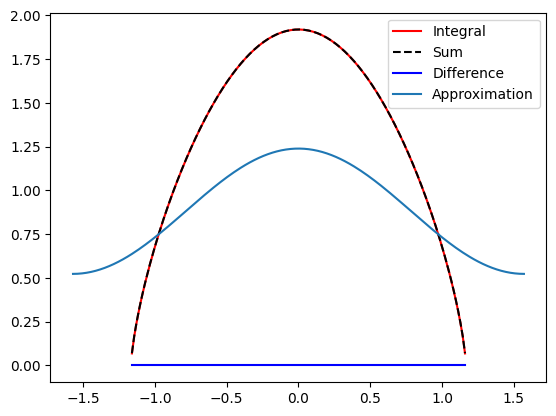

In [ ]:
# Integrate over over the year
phi_list = np.linspace(-np.pi/2, np.pi/2, 200)

integral_list = np.zeros(len(phi_list))
yearly_approx_list = np.zeros(len(phi_list))
yearly_exposure_sum_list = np.zeros(len(phi_list))

for i, phi in enumerate(phi_list):
    exposure = sp.integrate.quad(lambda O: dayly_exposure(O, phi), 0, 2*np.pi, limit=1000)
    integral_list[i] = exposure[0]*(1/(2*np.pi))
    yearly_approx_list[i] = yearly_approx(phi)
    yearly_exposure_sum_list[i] = yearly_exposure_sum(phi)

plt.plot(phi_list, integral_list, label = 'Integral', color = 'red')
plt.plot(phi_list, yearly_exposure_sum_list, label = 'Sum', linestyle = '--', color = 'black')
plt.plot(phi_list, ((integral_list - yearly_exposure_sum_list)**8), label = 'Difference', color = 'blue')
plt.plot(phi_list, yearly_approx_list, label = 'Approximation')
plt.legend()
plt.show()

C:\Users\rannu\AppData\Local\Temp\ipykernel_13192\2440188920.py:6: RuntimeWarning: invalid value encountered in arccos
  t0 = np.arccos(np.tan(delta) * np.tan(phi))


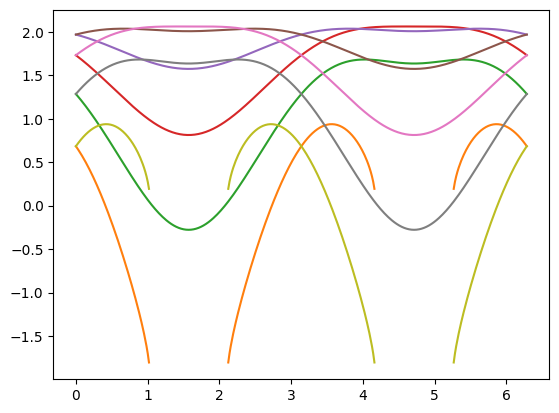

In [6]:
Orbit = np.linspace(0, 2*np.pi, 365)
Latitude_list = np.linspace(-np.pi/2, np.pi/2, 10)

fig, ax = plt.subplots()
for Latitude in Latitude_list:
    ax.plot(Orbit, dayly_exposure(Orbit, Latitude), label = f'Latitude = {Latitude}')
#ax.legend()
